# Dados Macro:

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import pandas_datareader as web

import matplotlib.pyplot as plt
import seaborn as sns

Tópicos:
* IPCA
* PIB
* CAGED
* Confiança do Consumidor/Empresário
* Câmbio
* Selic
* Juros Futuros
* Deficit Primario


In [2]:
sns.set()

In [3]:
# Função para obter dados do API do BCB

def bc_getdata(codigo):
  link = f'https://api.bcb.gov.br/dados/serie/bcdata.sgs.{codigo}/dados?formato=json'
  df = pd.read_json(link)
  df['data'] = pd.to_datetime(df['data'],dayfirst=True)
  df.set_index('data',drop=True,inplace=True)
  #df = df['valor']
  return df

## IPCA:

### Variação Mensal:

In [4]:
url_ipca = 'https://apisidra.ibge.gov.br/values/t/7061/n1/all/v/306/p/all/c315/7169,7170,7445,7486,7558,7625,7660,7712,7766,7786/d/v306%202'

In [5]:
ipca = pd.read_json(url_ipca)
ipca = ipca[['D3C','D4N','V']]
ipca.columns = ['Mês','Var','Valor']
ipca = ipca[1:]

In [6]:
ipca['Mês'] = pd.to_datetime(ipca['Mês'],format='%Y%m')
ipca.set_index('Mês',drop=True,inplace=True)
ipca['Valor'] = ipca['Valor'].astype(float)
ipca = ipca.pivot(columns='Var',values='Valor')

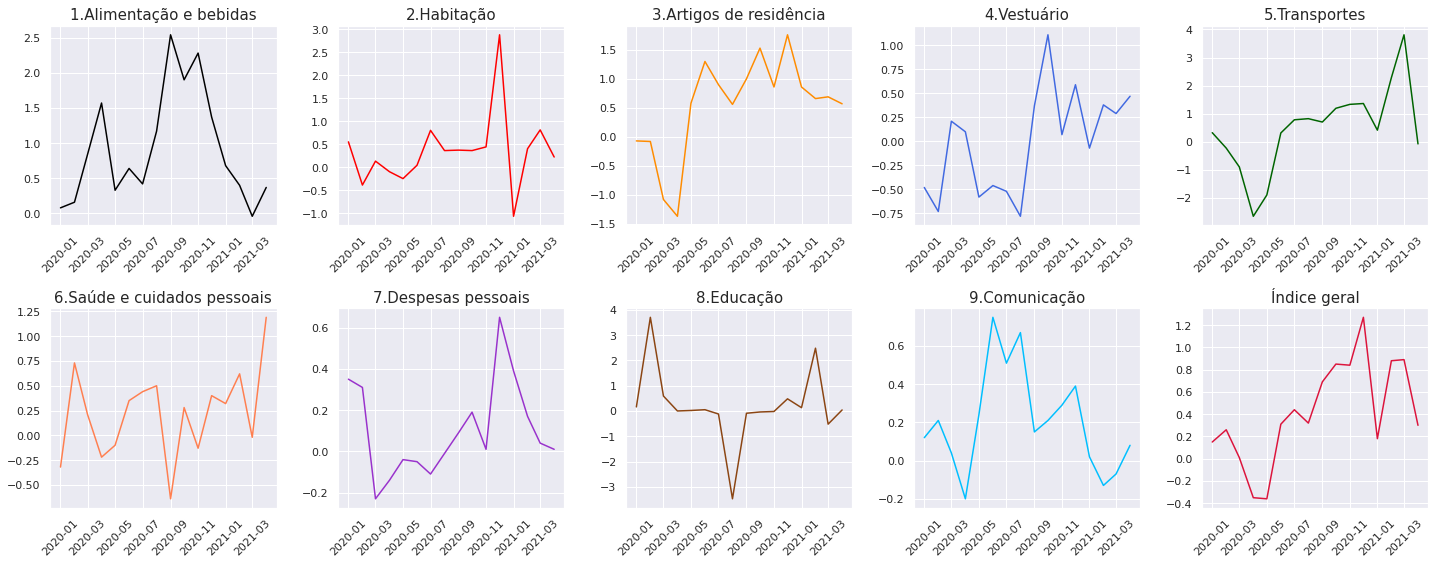

In [9]:
f = plt.figure(figsize=(20,8))

#f.suptitle('Variação Mensal dos Componentes do IPCA', fontsize=16)
colors = ['black','red','darkorange','royalblue','darkgreen','coral','darkorchid','saddlebrown','deepskyblue','crimson']
for i,n in enumerate(ipca.columns):
  f.add_subplot(2, 5, i+1)
  plt.plot(ipca[n],color=colors[i]) 
  plt.title(n,fontsize=15)
  plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

### Variação Pesos:

In [10]:
url_pesos = 'https://apisidra.ibge.gov.br/values/t/7061/n1/all/v/309/p/all/c315/7169,7170,7445,7486,7558,7625,7660,7712,7766,7786/d/v309%204'

In [11]:
ipca_pesos = pd.read_json(url_pesos)
ipca_pesos = ipca_pesos[['D3C','D4N','V']]
ipca_pesos.columns = ['Mês','Var','Valor']
ipca_pesos = ipca_pesos[1:]

In [12]:
ipca_pesos['Mês'] = pd.to_datetime(ipca_pesos['Mês'],format='%Y%m')
ipca_pesos.set_index('Mês',drop=True,inplace=True)
ipca_pesos['Valor'] = ipca_pesos['Valor'].astype(float)
ipca_pesos = ipca_pesos.pivot(columns='Var',values='Valor')

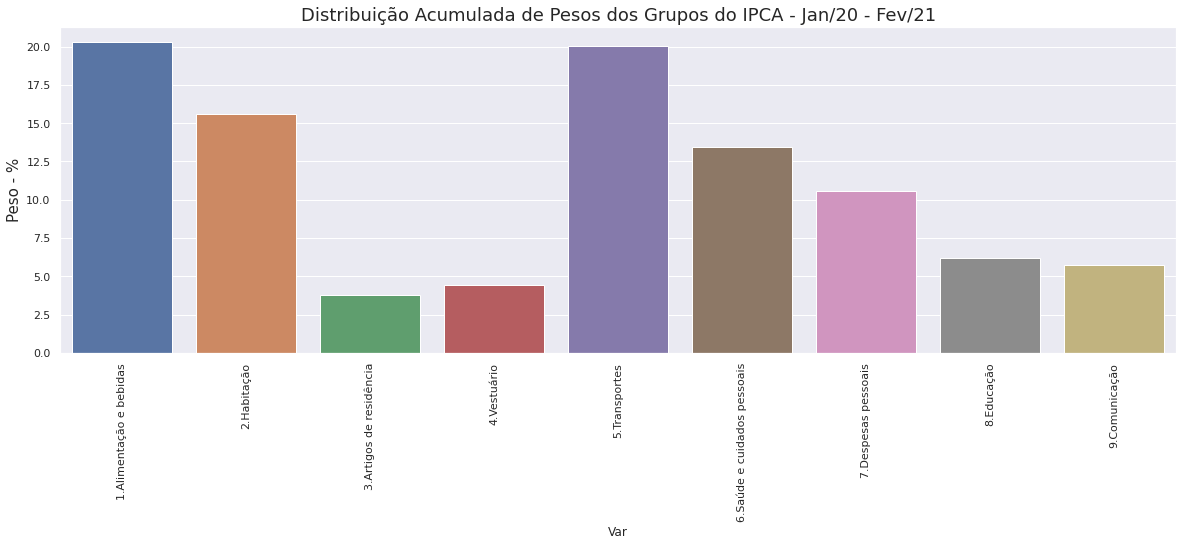

In [18]:
plt.figure(figsize = (20,6))

sns.barplot(x = ipca_pesos.columns[0:-1],y = ipca_pesos.iloc[:,0:-1].sum()/len(ipca_pesos.index))
plt.title('Distribuição Acumulada de Pesos dos Grupos do IPCA - Jan/20 - Fev/21',fontsize=18)
plt.ylabel('Peso - %',fontsize=15)
plt.xticks(rotation=90)

plt.show()

### Variação Mensal (Classificações BACEN):

In [19]:
codigos = [4447,4448,4449,10841,10842,10843,10844,11428]

In [20]:
ipca_classesbc = pd.DataFrame()
for c in codigos:
  ipca_classesbc[c] = bc_getdata(c)['valor']
  ipca_classesbc = ipca_classesbc[ipca_classesbc.index >= '2010-01-01 00:00:00']

ipca_classesbc.columns = ['Comercializáveis','Não Comercializáveis','Monitorados',
                         'Bens não-duráveis','Bens semi-duráveis','Duráveis',
                         'Serviços','Itens Livres']

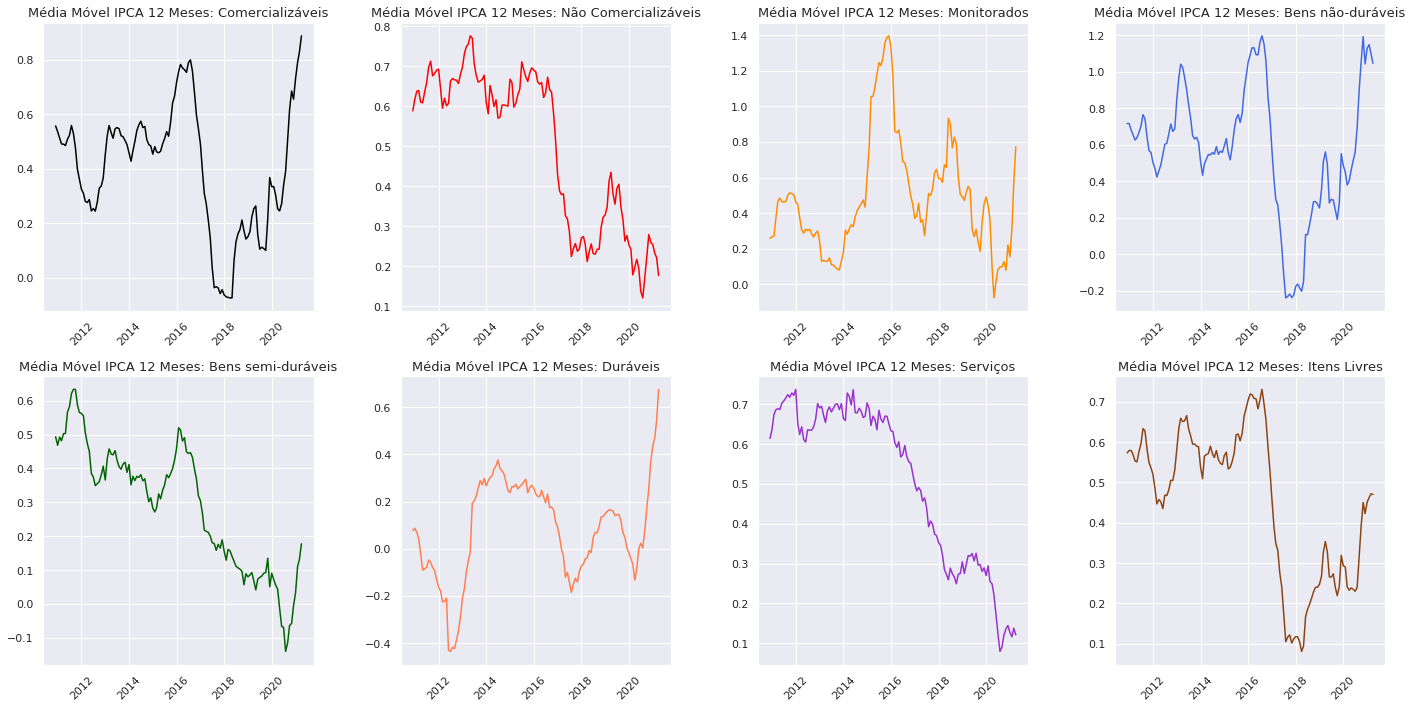

In [21]:
f = plt.figure(figsize=(20,10))

colors = ['black','red','darkorange','royalblue','darkgreen','coral','darkorchid','saddlebrown','deepskyblue','crimson']
for i,n in enumerate(ipca_classesbc.columns):
  fitem = f.add_subplot(2, 4, i+1)
  plt.plot(ipca_classesbc[n].rolling(12).mean(),color=colors[i]) 
  plt.title('Média Móvel IPCA 12 Meses: '+n,fontsize=13)
  plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

## IGPM

### Comparação IGPM x IPCA:

In [22]:
codigos = [189,7450,7453,7456]
# 189  - Índice geral de preços do mercado (IGP-M)
# 7450 - Índice de Preços por Atacado-Mercado (IPA-M)
# 7453 - Índice de Preços ao Consumidor-Mercado (IPC-M)
# 7456 - Índice Nacional de Custo da Construção-Mercado (INCC-M)

In [23]:
igpm = pd.DataFrame()
for c in codigos:
  igpm[c] = bc_getdata(c)['valor']
igpm = igpm[igpm.index >= '2000-01-01 00:00:00']
igpm.columns = ['IGP-M','IPA-M','IPC-M','INCC-M']

In [24]:
url_serieipca = 'https://apisidra.ibge.gov.br/values/t/118/n1/all/v/all/p/all/d/v306%202'

In [25]:
ipca_serie = pd.read_json(url_serieipca)
ipca_serie = ipca_serie[['D3C','V']]
ipca_serie.columns = ['Mês','Valor']
ipca_serie = ipca_serie[1:]

In [26]:
ipca_serie['Mês'] = pd.to_datetime(ipca_serie['Mês'],format='%Y%m')
ipca_serie.set_index('Mês',drop=True,inplace=True)
ipca_serie['Valor'] = ipca_serie['Valor'].astype(float)

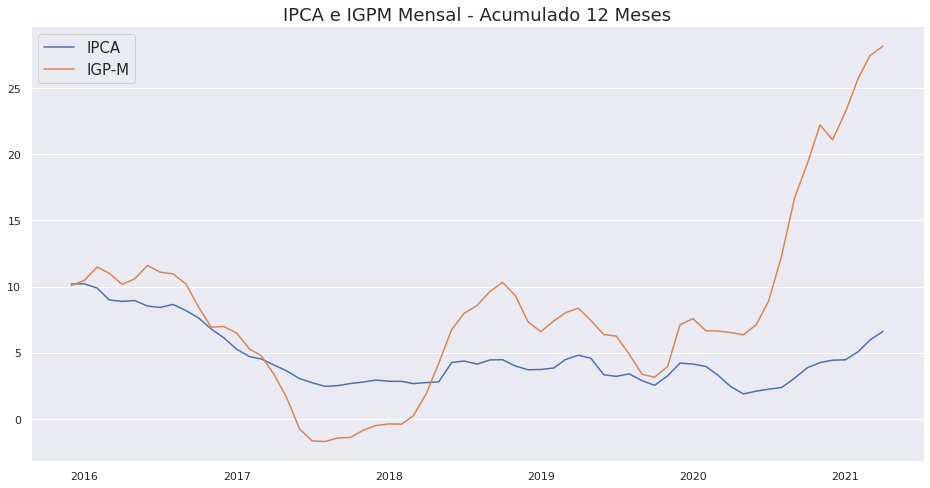

In [27]:
plt.figure(figsize = (16,8))

plt.plot(ipca_serie[ipca_serie.index >= '2015'].rolling(12).sum(), label = 'IPCA')
plt.plot(igpm[igpm.index >= '2015']['IGP-M'].rolling(12).sum(), label = 'IGP-M')
plt.grid(axis = 'x')

plt.title('IPCA e IGPM Mensal - Acumulado 12 Meses', fontsize = 18)
plt.legend(fontsize = 15)

plt.show()

### Desagregando Variação dos Componentes:

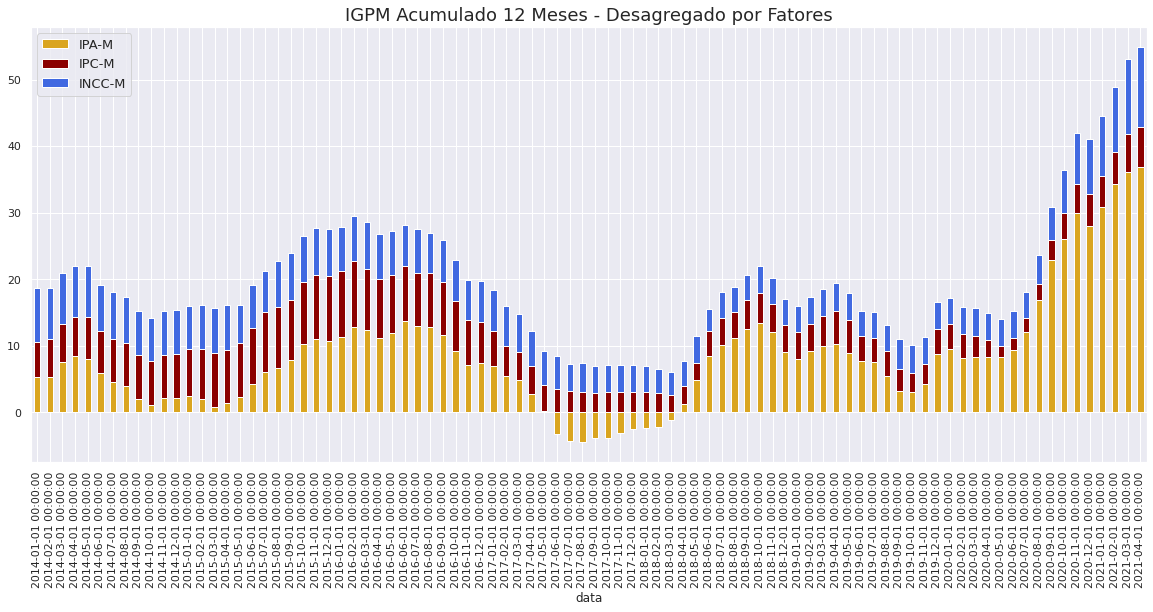

In [28]:
igpm.loc[:,'IPA-M':].rolling(12).sum()[igpm.index >= '2014'].plot.bar(stacked=True, 
                                                                      figsize = (20,8), 
                                                                      color = ['goldenrod','darkred','royalblue'])
plt.title('IGPM Acumulado 12 Meses - Desagregado por Fatores', fontsize = 18)
plt.legend(fontsize = 13)

plt.show()

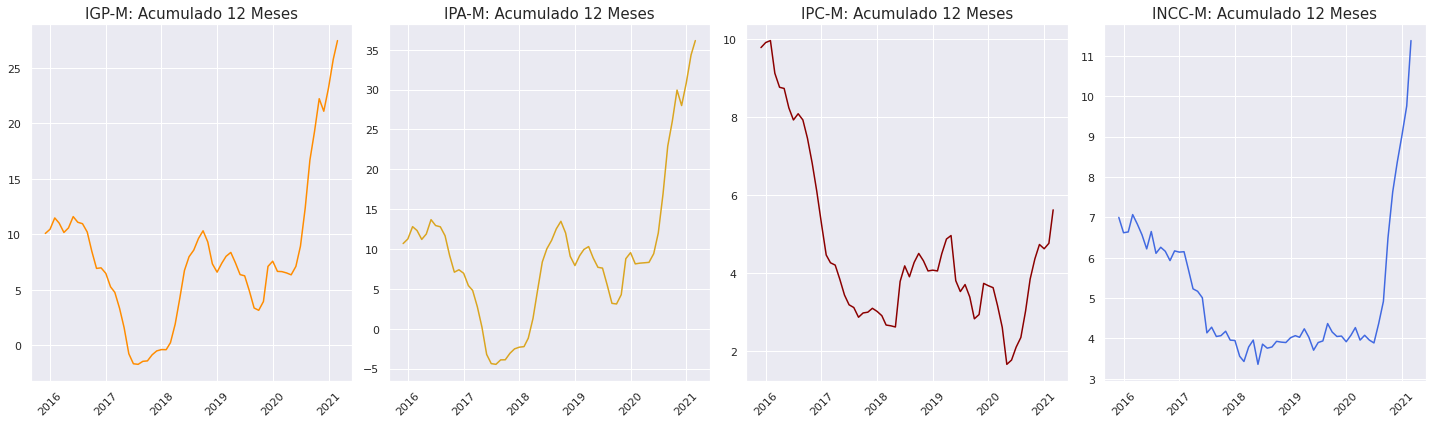

In [ ]:
f = plt.figure(figsize=(20,6))
colors = ['darkorange','goldenrod','darkred','royalblue']
for i,n in enumerate(igpm.columns):
  f.add_subplot(1, 4, i+1)
  plt.plot(igpm[igpm.index >= '2015'][n].rolling(12).sum(),color=colors[i]) 
  plt.title(f'{n}: Acumulado 12 Meses',fontsize=15)
  plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## PIB:

### Variação do PIB - Demanda Agregada:

In [29]:
url_pib = 'https://apisidra.ibge.gov.br/values/t/1621/n1/all/v/all/p/all/c11255/90687,90691,90696,90707,93404,93405,93406,93407,93408/d/v584%202'

In [30]:
PIB = pd.read_json(url_pib)
PIB = PIB[['D3C','D4N','V']]
PIB.columns = PIB.iloc[0]
PIB = PIB[1:]

PIB.set_index('Trimestre (Código)',inplace=True,drop=True)
PIB = PIB.pivot(columns = 'Setores e subsetores',values = 'Valor')

for v in PIB.columns:
 PIB[v] = pd.to_numeric(PIB[v])
datas = []

for data in PIB.index:
  datas.append(dt.datetime.strptime(data, '%Y%m').strftime('%Y/%m'))

PIB['Trimestre'] = datas
PIB['Trimestre'] = pd.to_datetime(PIB['Trimestre'],format='%Y/%m')
PIB.set_index('Trimestre',inplace=True,drop=True)

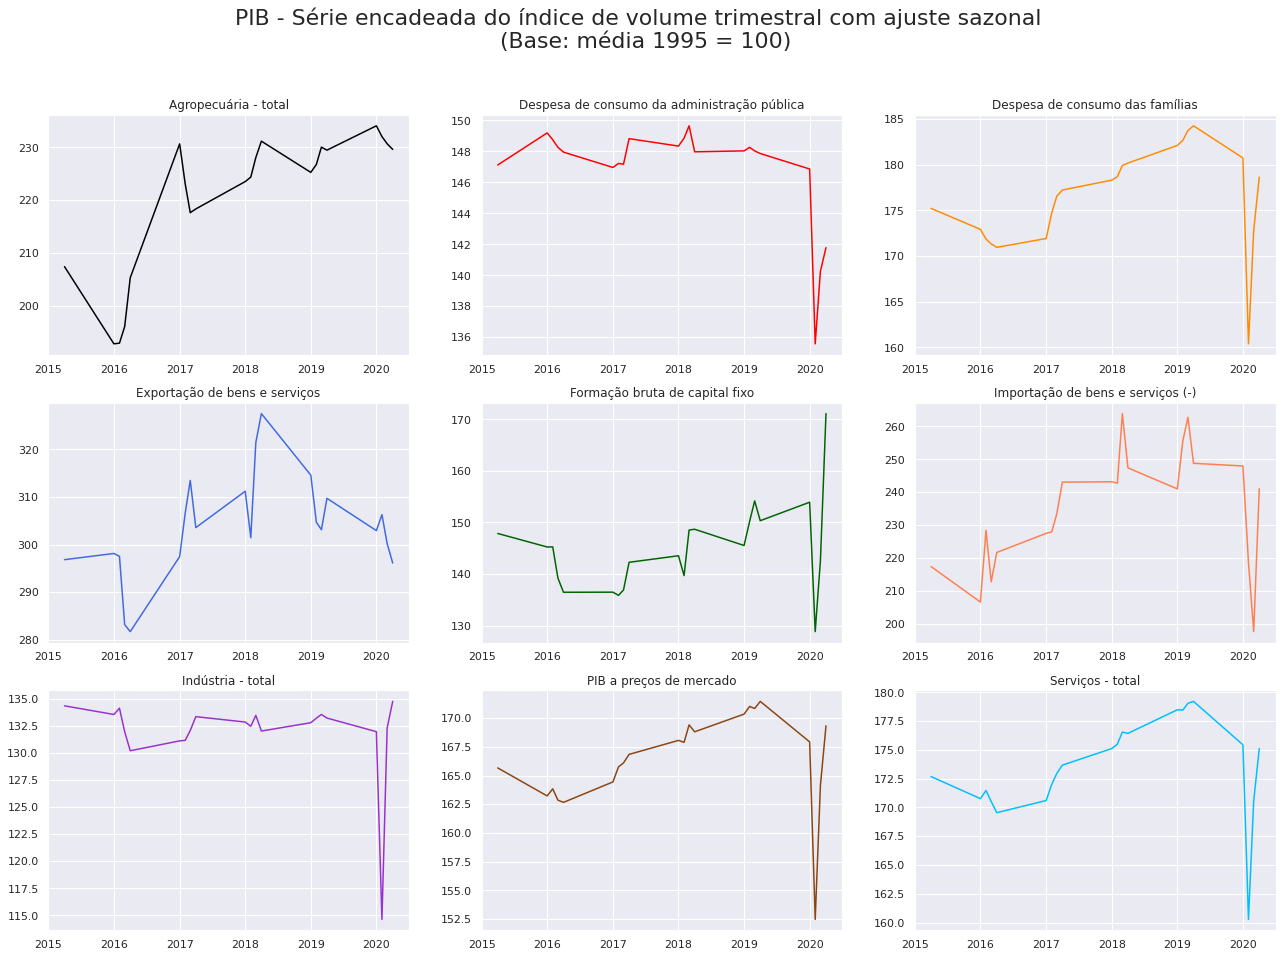

In [31]:
f = plt.figure(figsize=(22,15))

plt.suptitle('PIB - Série encadeada do índice de volume trimestral com ajuste sazonal \n (Base: média 1995 = 100)',fontsize=22)
colors = ['black','red','darkorange','royalblue','darkgreen','coral','darkorchid','saddlebrown','deepskyblue','orangered']
for i,n in enumerate(PIB[PIB.columns]):
  f.add_subplot(3, 3, i+1)
  plt.plot(PIB[PIB.index >= '2015-04'][n],color=colors[i]) 
  plt.title(n)
#plt.tight_layout()

plt.show()

## IBC-BR

In [36]:
ibc_br = bc_getdata(24364)
ibc_br.columns = ['IBC-BR']

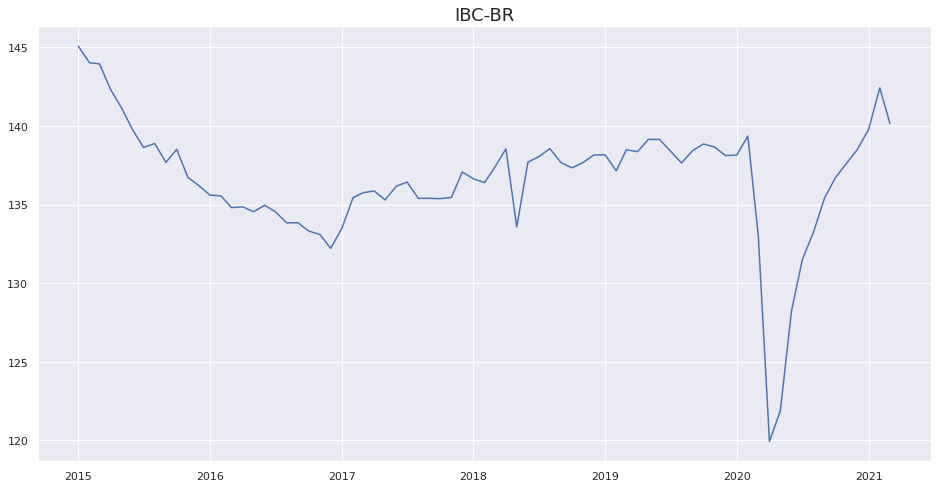

In [37]:
plt.figure(figsize = (16,8))

plt.plot(ibc_br[ibc_br.index >= '2015'])
plt.title('IBC-BR', fontsize = 18)

plt.show()

## CAGED:

In [38]:
codigos = [28763,28764,28765,28766,28770,28771,28772]
          # 28763 - Novo Caged - Total
          # 28764 - Novo Caged - Agropecuária
          # 28765 - Novo Caged - Indústrias extrativas
          # 28766 - Novo Caged - Indústrias de transformação
          # 28770 - Novo Caged - Construção
          # 28771 - Novo Caged - Comércio
          # 28772 - Novo Caged - Serviços

In [39]:
caged = pd.DataFrame()
for c in codigos:
  caged[c] = bc_getdata(c)['valor']
  caged = caged[caged.index >= '2010-01-01 00:00:00']

caged.columns = ['Total','Agropecuária','Indústrias extrativas',
                 'Indústrias de transformação','Construção','Comércio',
                 'Serviços']

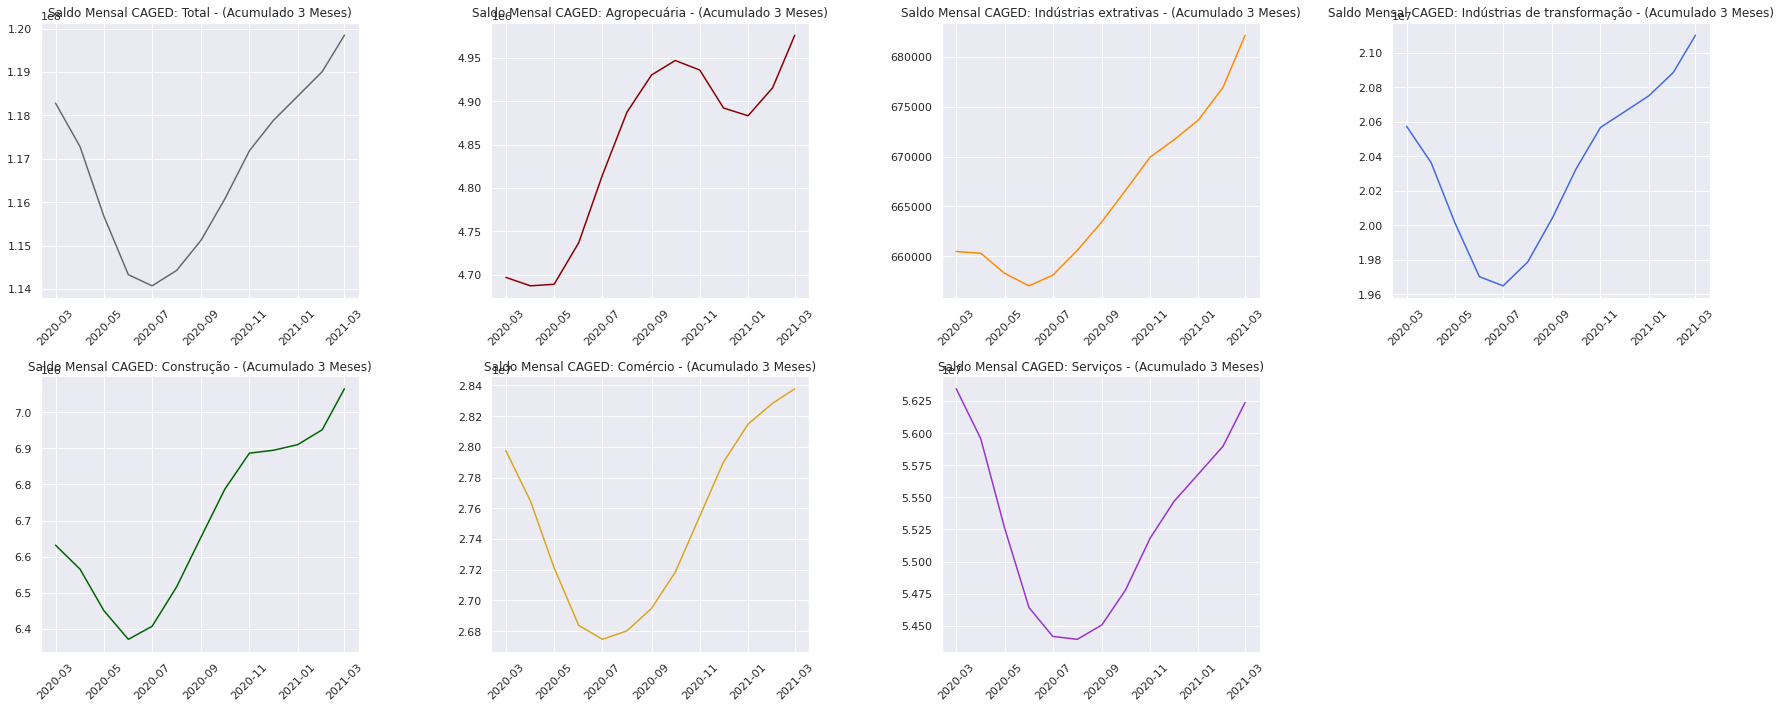

In [40]:
f = plt.figure(figsize=(25,10))

colors = ['dimgrey','darkred','darkorange','royalblue','darkgreen','goldenrod','darkorchid']
for i,n in enumerate(caged.columns):
  f.add_subplot(2, 4, i+1)
  plt.plot(caged[caged.index >= '2020'][n].rolling(3).sum(),color=colors[i]) 
  plt.title(f'Saldo Mensal CAGED: {n} - (Acumulado 3 Meses)')
  plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [41]:
caged_prop = caged[['Agropecuária','Indústrias extrativas','Indústrias de transformação','Construção','Comércio','Serviços']].div(caged.Total, axis=0)

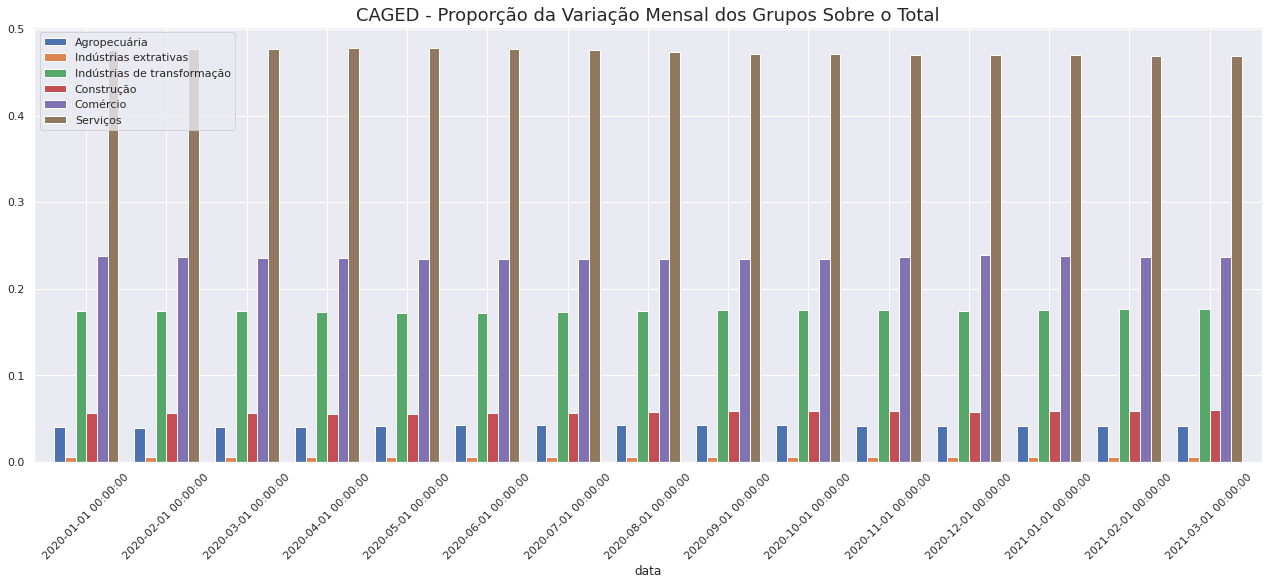

In [42]:
caged_prop[caged_prop.index >= '2020'].plot.bar(figsize=(22,8),width = 0.8)
plt.title('CAGED - Proporção da Variação Mensal dos Grupos Sobre o Total',fontsize = 18)
plt.xticks(rotation = 45)

plt.show()

### CAGED x IBC-BR

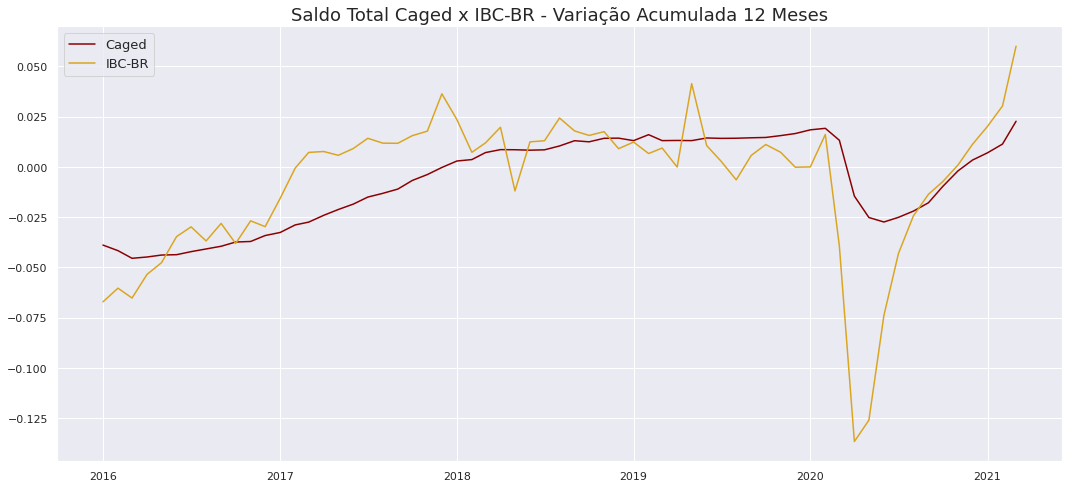

In [43]:
plt.figure(figsize = (18,8))

plt.plot(caged[caged.index >= '2015']['Total'].pct_change().rolling(12).sum(), label = 'Caged', color = 'darkred')
plt.plot(ibc_br[ibc_br.index >='2015'].pct_change().rolling(12).sum(), label = 'IBC-BR', color = 'goldenrod')
plt.legend(fontsize = 13)
plt.title('Saldo Total Caged x IBC-BR - Variação Acumulada 12 Meses',fontsize = 18)

plt.show()

## Confiança do Consumidor/Empresário:

In [44]:
codigos = [4393,7341,20339]
# Índice de Confiança do Consumidor
# Índice de Confiança do Empresário Industrial (ICEI) - Geral
# Sondagem de Serviços - Índice de Confiança de Serviços - Dessazonalizado

In [45]:
confianca = pd.DataFrame()
for c in codigos:
  confianca[c] = bc_getdata(c)['valor']
  confianca = confianca[confianca.index >= '2015-01-01 00:00:00']

In [46]:
confianca.columns = ['Confiança do Consumidor','Confiança do Empresário Industrial ','Confiança de Serviços']

In [47]:
confianca.fillna(method='ffill',inplace=True)

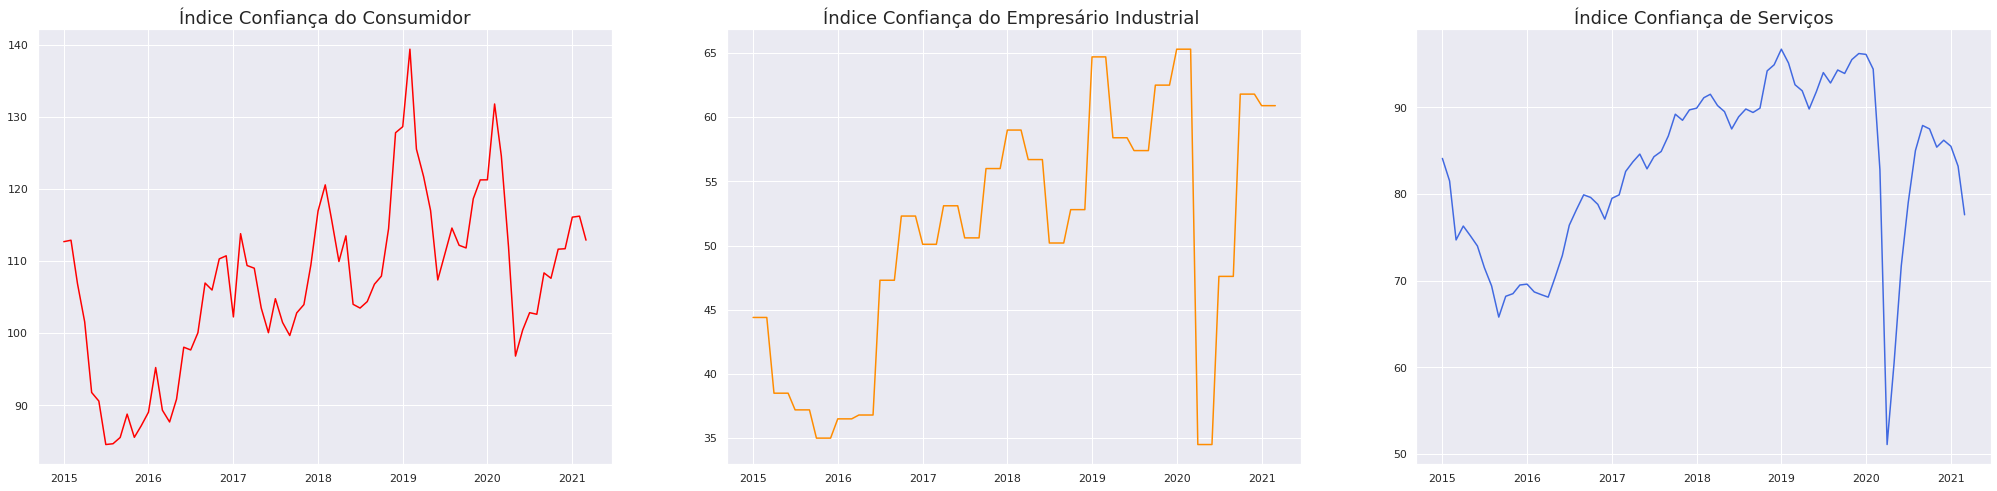

In [48]:
f = plt.figure(figsize=(35,8))

colors = ['red','darkorange','royalblue']
for i,n in enumerate(confianca.columns):
  f.add_subplot(1, 3, i+1)
  plt.plot(confianca[n],color=colors[i]) 
  plt.title(f'Índice {n}',fontsize=18)
#plt.tight_layout()

plt.show()

## Câmbio

In [49]:
# Países emergentes : Ao todo, são 151 países classificados nestas condições, segundo o FMI (Fundo Monetário Internacional).
# Países considerados na análise: 16 países que representam 76,7% do PIB (Produto Interno Bruto) do grupo de emergentes. 
# China - Iuan: CNY
# Russia - Rublo: RUB
# Índia - Rúpia: INR
# Indonésia - Rúpia: IDR
# México - Peso: MXN
# Arábia Saudita - Rial: SAR
# Polônia - Zlóti: PLN
# Tailândia - Baht: THB
# Filipinas - Peso: PHP
# Malásia - Ringuite: MYR
# Bangladesh - Taka: BDT
# África do Sul - Rand: ZAR
# Colômbia - Peso: COP
# Romênia - Leu: RON
# Chile - Peso: CLP
# Peru - Novo sol: PEN

In [50]:
moedas = ['CNYUSD=X','RUBUSD=X','INRUSD=X','IDRUSD=X',
          'MXNUSD=X','SARUSD=X','PLNUSD=X','THBUSD=X',
          'PHPUSD=X', 'MYRUSD=X','BDTUSD=X','ZARUSD=X',
          'COPUSD=X','RONUSD=X','CLPUSD=X','PENUSD=X']
          # Cesta de 16 que Agregam a Maior Contribuição ao PIB total dos Emergentes
          # China
          # Russia
          # Índia
          # Indonésia
          # México  
          # Arábia Saudita
          # Polônia 
          # Tailândia
          # Filipinas
          # Malásia 
          # Banglades
          # África do
          # Colômbia 
          # Romênia 
          # Chile 
          # Peru 

In [51]:
cesta_emerg = web.DataReader(moedas,'yahoo','2018-01-01','2020-12-31')['Adj Close']
cesta_emerg = cesta_emerg.fillna(method='ffill')

In [52]:
indice_emerg = (cesta_emerg.sum(axis=1)/cesta_emerg.iloc[0].sum())*100

In [53]:
dolar_real = bc_getdata(1)

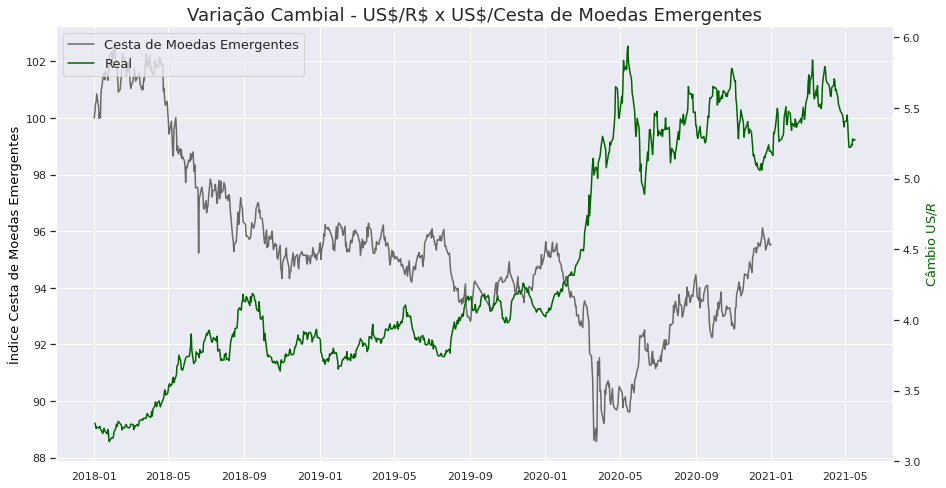

In [54]:
figure,axis_1 = plt.subplots(figsize=(15,8))
axis_1.plot(indice_emerg,color='dimgrey',label='Cesta de Moedas Emergentes')
axis_1.set_ylabel('Índice Cesta de Moedas Emergentes',color = 'black',fontsize=13)

axis_2 = axis_1.twinx()
axis_2.plot(dolar_real[dolar_real.index >= '2018'],color='darkgreen',label='Real')
axis_2.set_ylabel('Câmbio US$/R$',color = 'darkgreen',fontsize=13)
axis_2.grid(b=None)

lines_1, labels_1 = axis_1.get_legend_handles_labels()
lines_2, labels_2 = axis_2.get_legend_handles_labels()
lines = lines_1 + lines_2
labels = labels_1 + labels_2

axis_1.legend(lines, labels,loc='upper left',fontsize=13)
plt.title('Variação Cambial - US$/R$ x US$/Cesta de Moedas Emergentes',fontsize = 18)

plt.show()

## Selic, Juros Futuros

In [55]:
codigos = [11,432,1178]
          #11 - Taxa Selic Spot
          #432 - Taxa Selic Meta
          #1178 - Selic anualizada base 252

In [57]:
selic = pd.DataFrame()
for c in codigos:
  selic[c] = bc_getdata(c)['valor']
  selic = selic[selic.index >= '2010-01-01 00:00:00']
  

In [ ]:
selic.columns = ['Selic Spot','Selic Meta ','Selic Spot AA (252)']

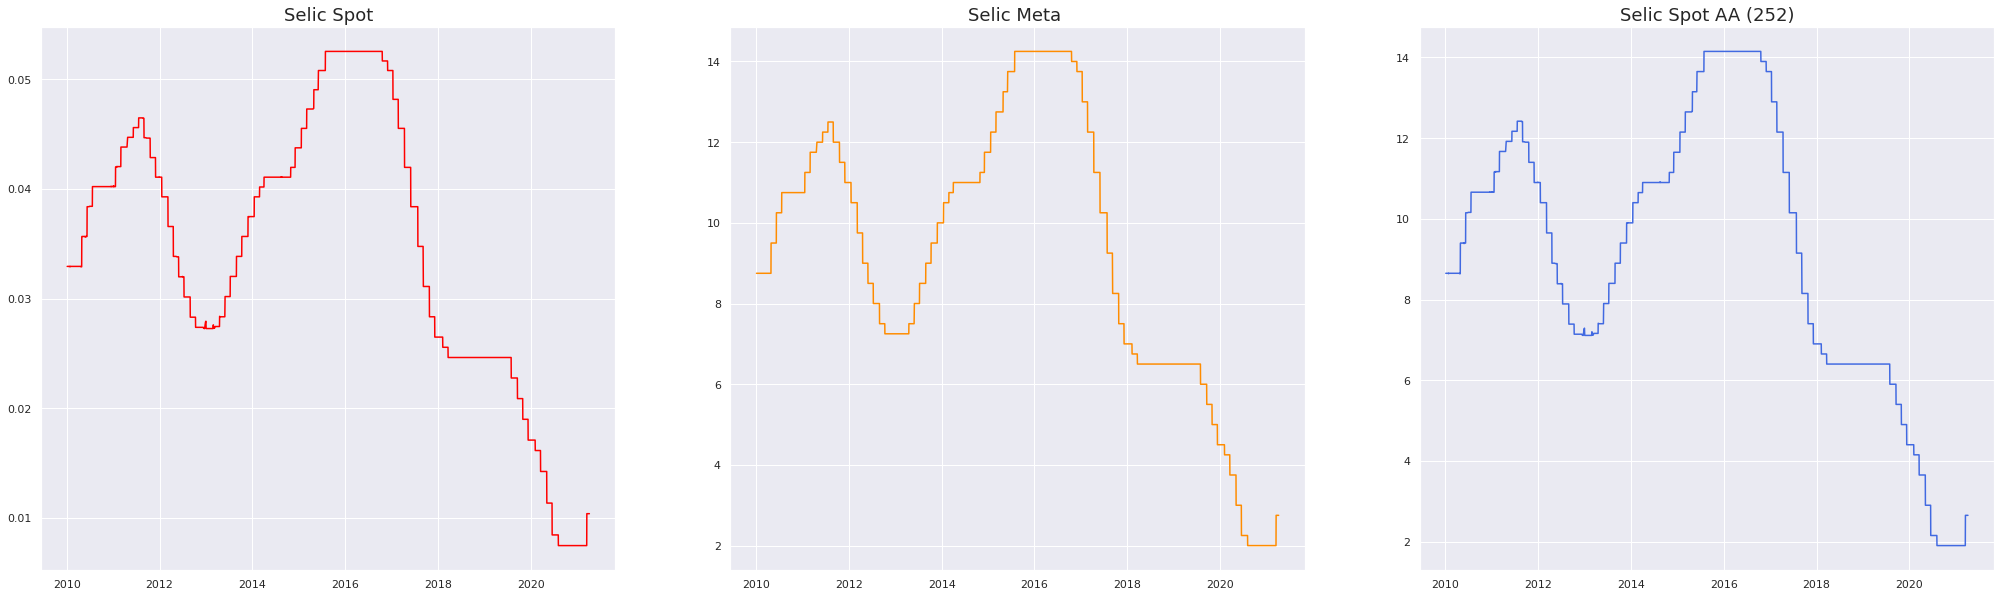

In [ ]:
f = plt.figure(figsize=(35,10))
colors = ['red','darkorange','royalblue']
for i,n in enumerate(selic.columns):
  f.add_subplot(1, 3, i+1)
  plt.plot(selic[n],color=colors[i]) 
  plt.title(n,fontsize=18)
#plt.tight_layout()
plt.show()

### Curva de Juros Fechamento - Ambima 

In [ ]:
taxas = pd.read_csv('/content/CurvaAmbima.csv',sep=';',encoding='latin 1')

In [ ]:
taxas.drop(columns=['Beta 4','Lambda 1','Lambda 2'],inplace=True)
taxas = taxas[4:22]
taxas.reset_index(drop=True,inplace=True)
taxas.columns = ['Vertices','ETTJ IPCA','ETTJ PREF','Inflação Implícita']

In [ ]:
taxas['ETTJ IPCA'] = [i.replace(',', '.') for i in taxas['ETTJ IPCA']]
taxas['ETTJ PREF'] = [x.replace(',', '.') for x in taxas['ETTJ PREF']]
taxas['Inflação Implícita'] = [x.replace(',', '.') for x in taxas['Inflação Implícita']]

In [ ]:
taxas['ETTJ IPCA'] = taxas['ETTJ IPCA'].astype(float)
taxas['ETTJ PREF'] = taxas['ETTJ PREF'].astype(float)
taxas['Inflação Implícita'] = taxas['Inflação Implícita'].astype(float)

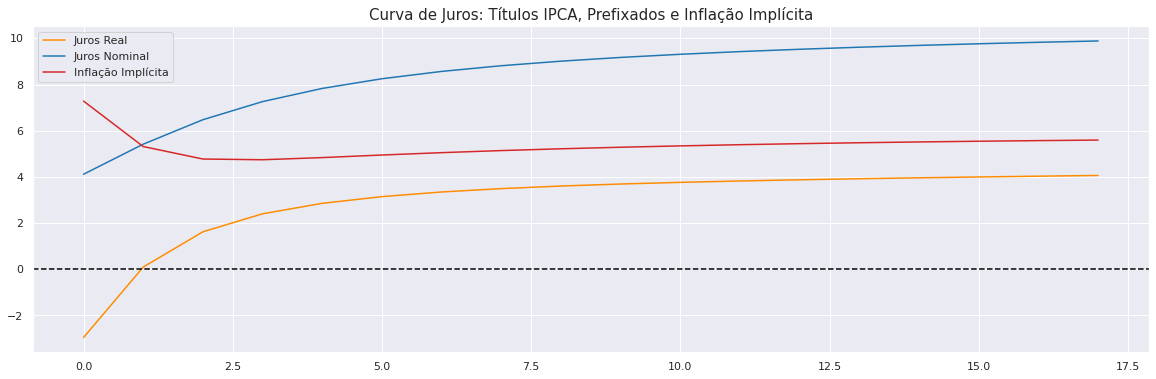

In [ ]:
plt.figure(figsize=(20,6))
plt.plot(taxas['ETTJ IPCA'],label='Juros Real',color='darkorange')
plt.plot(taxas['ETTJ PREF'],label='Juros Nominal',color='tab:blue')
plt.plot(taxas['Inflação Implícita'],label='Inflação Implícita',color='tab:red')
plt.title('Curva de Juros: Títulos IPCA, Prefixados e Inflação Implícita',fontsize=15)
plt.axhline(y=0,ls='--',color='black')
plt.legend()
plt.show()

## Defict Primário

In [ ]:
url_fiscal = 'http://sisweb.tesouro.gov.br/apex/cosis/thot/link/rtn/serie-historica?conteudo=cdn'

In [ ]:
fiscal = pd.read_excel(url_fiscal,sheet_name='1.1-A',skiprows=4)

In [ ]:
receita_total = fiscal.iloc[32][1:].astype(int)
despesa_total = fiscal.iloc[33][1:].astype(int)

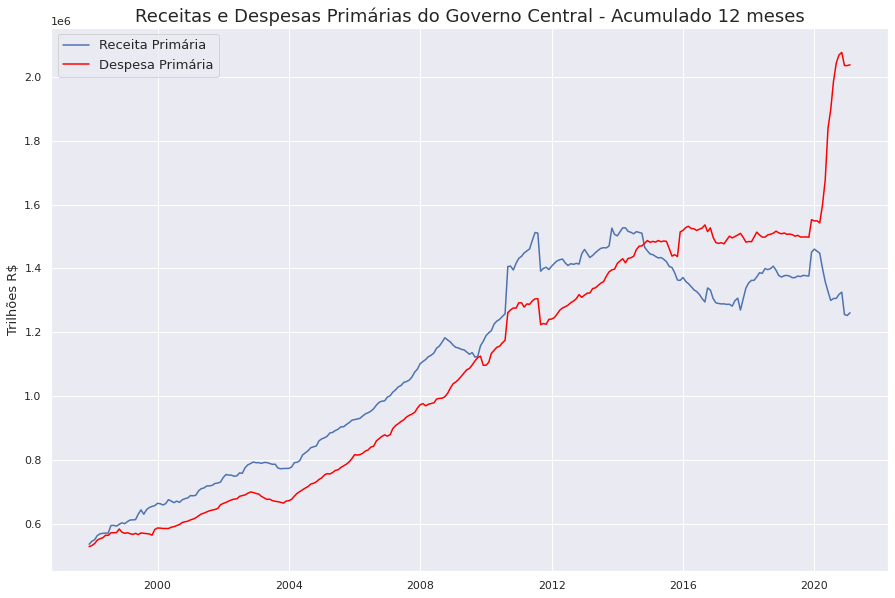

In [ ]:
plt.figure(figsize = (15,10))

plt.plot(receita_total.rolling(12).sum(), label = 'Receita Primária')
plt.plot(despesa_total.rolling(12).sum(), color='red', label = 'Despesa Primária')
plt.title('Receitas e Despesas Primárias do Governo Central - Acumulado 12 meses',fontsize = 18)
plt.ylabel('Trilhões R$', fontsize = 13)

plt.legend(fontsize = 13)

plt.show()

In [ ]:
resultado_primario = fiscal.iloc[60][1:].astype(int)

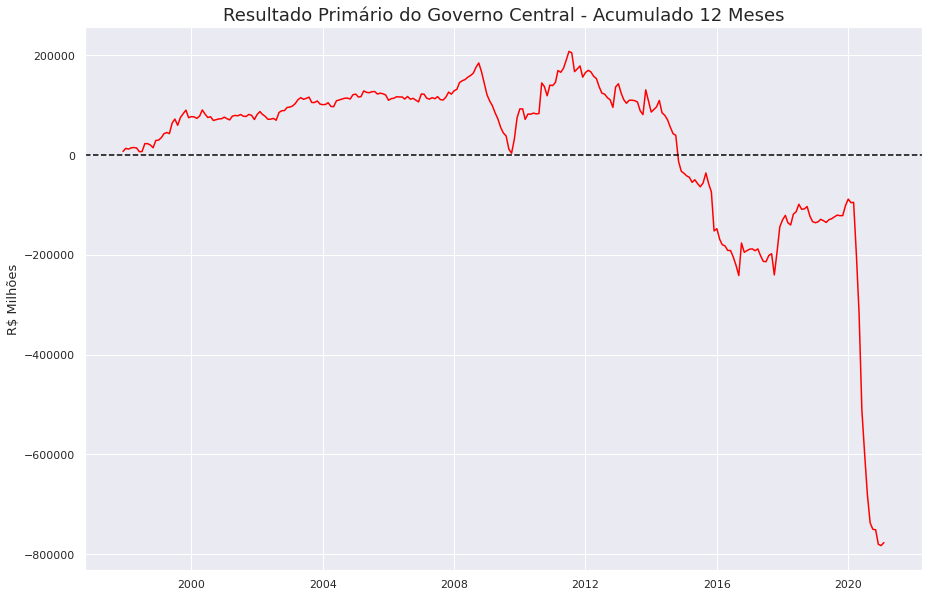

In [ ]:
plt.figure(figsize=(15,10))

plt.plot(resultado_primario.rolling(12).sum(),color='red')
plt.title('Resultado Primário do Governo Central - Acumulado 12 Meses',fontsize=18)
plt.axhline(y=0,ls = '--', color = 'black')
plt.ylabel('R$ Milhões',fontsize=13)

plt.show()

In [ ]:
despesas = pd.DataFrame()
despesas['Total'] = fiscal.iloc[33][1:].astype(int)
despesas['Previdência'] = fiscal.iloc[34][1:].astype(int)
despesas['Pessoal e Encargos Sociais'] = fiscal.iloc[35][1:].astype(int)
despesas['Outras Despesas Obrigatórias'] = fiscal.iloc[36][1:].astype(int)
despesas['Discricionárias'] = fiscal.iloc[57][1:].astype(int)

In [ ]:
despesas_prop = despesas[['Previdência','Pessoal e Encargos Sociais','Outras Despesas Obrigatórias','Discricionárias']].div(despesas.Total, axis=0)

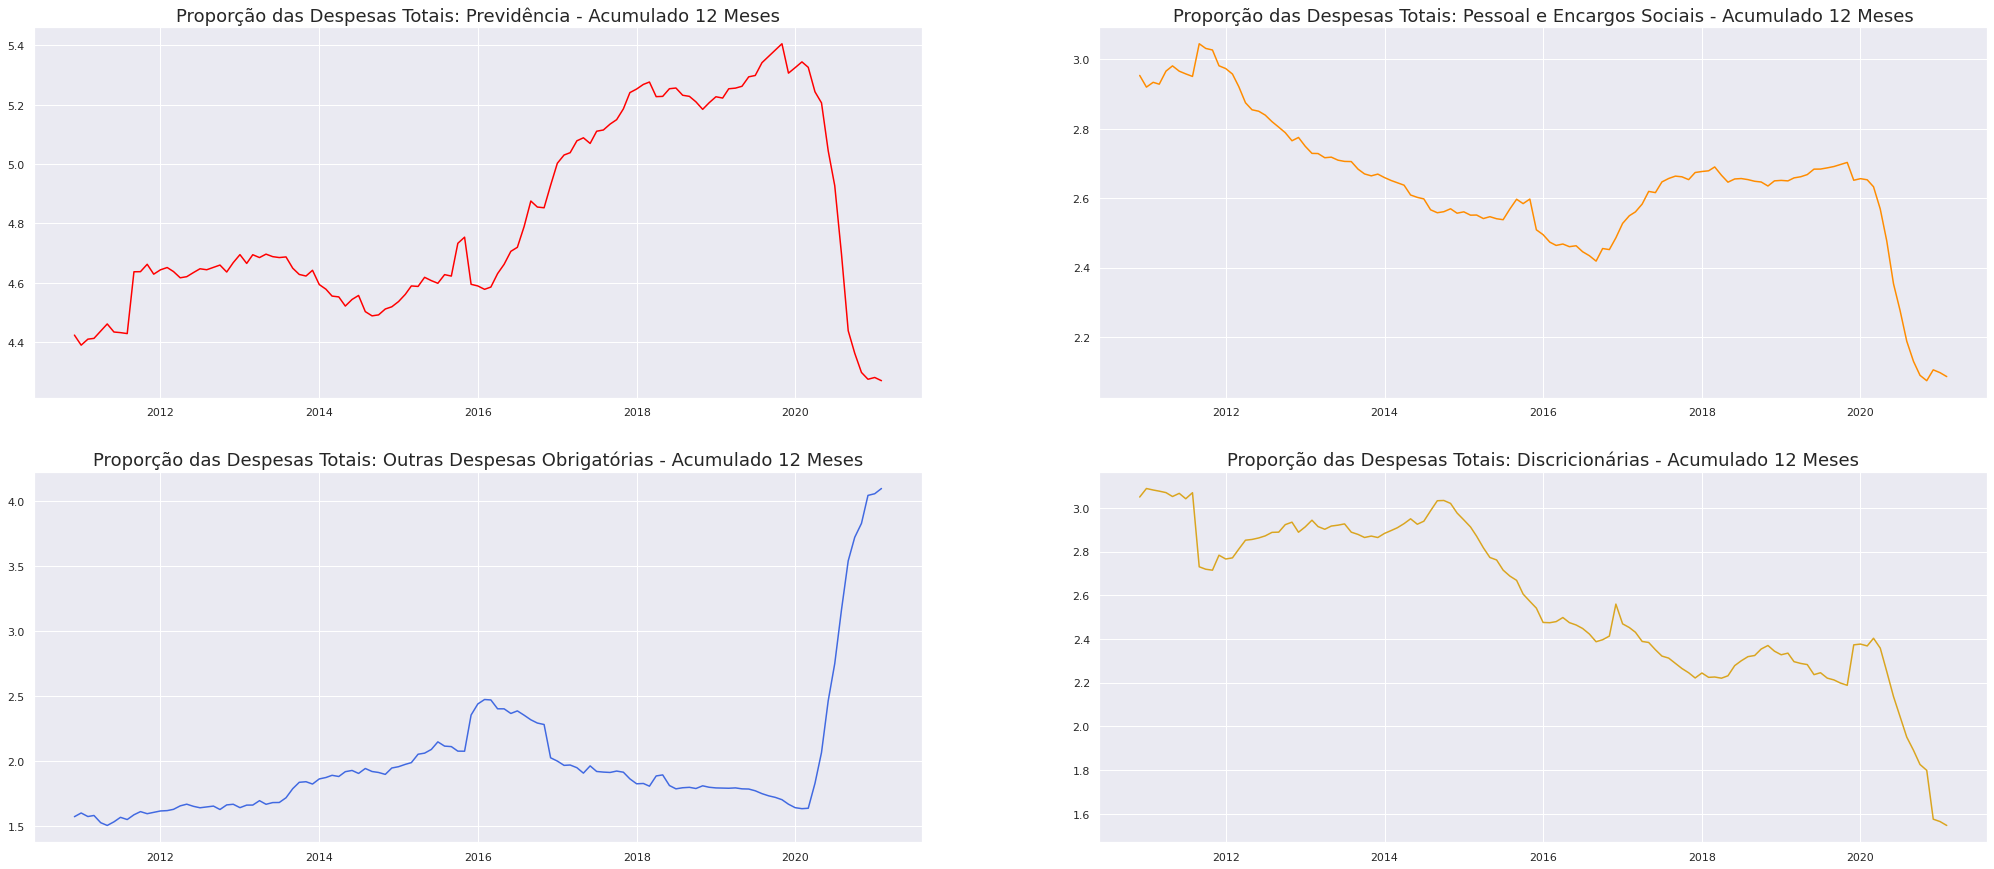

In [ ]:
f = plt.figure(figsize=(35,15))
colors = ['red','darkorange','royalblue','goldenrod']
for i,n in enumerate(despesas_prop.columns):
  f.add_subplot(2, 2, i+1)
  plt.plot(despesas_prop[despesas_prop.index >= '2010'][n].rolling(12).sum(),color=colors[i]) 
  plt.title(f'Proporção das Despesas Totais: {n} - Acumulado 12 Meses',fontsize=18)
#plt.tight_layout()
plt.show()

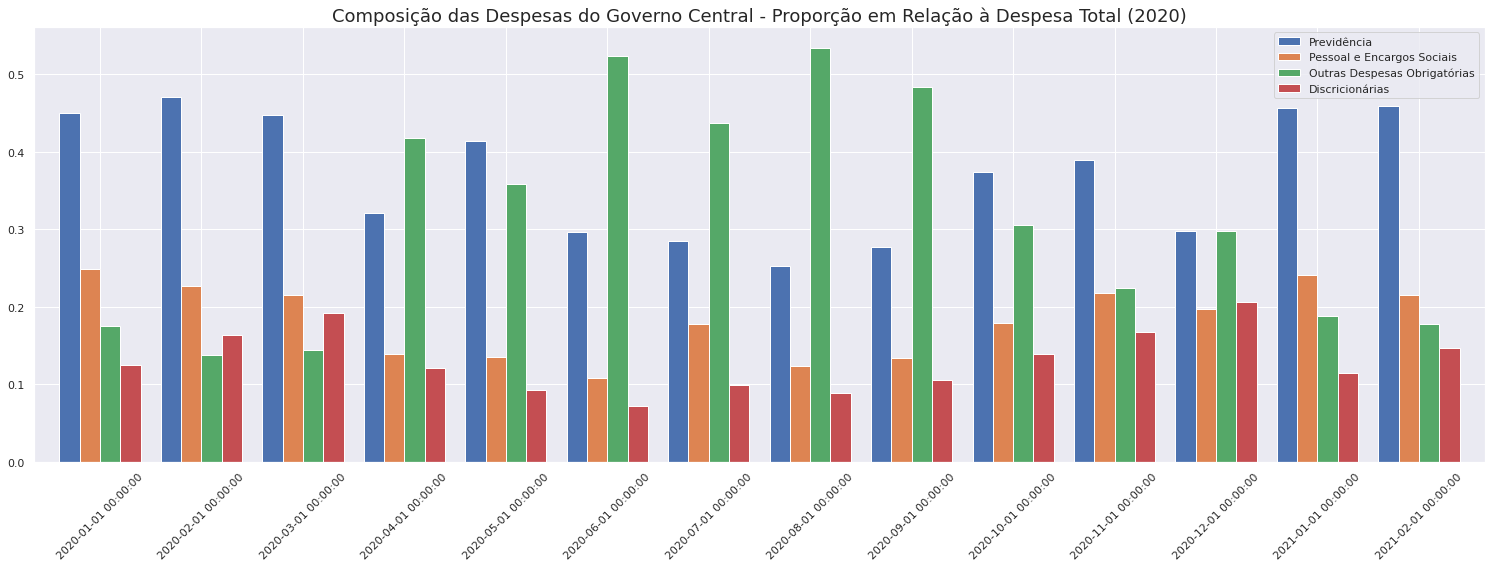

In [ ]:
despesas_prop[despesas_prop.index >= '2020'].plot.bar(figsize=(26,8),width = 0.8)
plt.title('Composição das Despesas do Governo Central - Proporção em Relação à Despesa Total (2020)',fontsize = 18)
plt.xticks(rotation=45)
plt.grid(axis = 'x')

plt.show()
#date_form = DateFormatter("%m-%d")
#ax.xaxis.set_major_formatter(date_form)